# 5. Improve Model

First predictions = baseline predictions.\
First model = baseline model.

From a data perspective: 
* Could we collect more data? (Generally, the more data, the better model)
* Could we improve our data? 

From a model perspective: 
* Is there a better model we can use ?
* Could we improve the current model? 

Hyperparameters vs Parameters: 
* Parameters = model find these patterns in data 
* Hyperparameters = setting on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:
1. By hand
2. Randomly via RandomSearchCV
3. Exhaustively via GridSearchCV

In [1]:
import numpy as np
import pandas as pd 

In [2]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [3]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 5.1 Tuning hyperparameter by hand

We are going to try and adjust : 
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [5]:
def evaluate_def(y_true, y_preds) :
    """
    Performs evaluation comparison on y_true labels and y_preds labels
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metrics_dict = {
        "accuracy" : round(accuracy,2),
        "precision" : round(precision,2),
        "recall" : round(recall,2),
        "f1" : round(f1,2)
    }
    for k,v in metrics_dict.items() : 
        print(f"{k} : {v}")
    return metrics_dict

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

heart_disease = pd.read_csv("../../data/heart-disease.csv")

# shuffled data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into x, y
x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into trainning, validation and test set with propotion 0.7,0.15,0.15
n_samples = heart_disease_shuffled.shape[0]
num_trainning_sample = int(0.7 * n_samples)
num_validation_sample = int(0.15 * n_samples)

x_train, y_train = x[:num_trainning_sample] , y[:num_trainning_sample]
x_valid, y_valid = x[num_trainning_sample:num_trainning_sample+num_validation_sample] , y[num_trainning_sample:num_trainning_sample+num_validation_sample]
x_test, y_test = x[num_trainning_sample+num_validation_sample:], y[num_trainning_sample+num_validation_sample:]

# Instantiate model with n_estimators=10
clf = RandomForestClassifier(n_estimators=10).fit(x_train, y_train)

# Make baseline predictions
y_preds = clf.predict(x_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_def(y_valid, y_preds)

baseline_metrics

accuracy : 0.8
precision : 0.77
recall : 0.92
f1 : 0.84


{'accuracy': 0.8, 'precision': 0.77, 'recall': 0.92, 'f1': 0.84}

In [7]:
np.random.seed(42)
# Instantiate model with n_estimators=100
clf_2 = RandomForestClassifier(n_estimators=100).fit(x_train, y_train)
# Make baseline predictions
y_preds = clf_2.predict(x_valid)
# Evaluate the classifier on validation set
clf2_metrics = evaluate_def(y_valid, y_preds)

clf2_metrics

accuracy : 0.82
precision : 0.84
recall : 0.84
f1 : 0.84


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

In [8]:
np.random.seed(42)
# Instantiate model with n_estimators=100 , max_depth=10
clf_3 = RandomForestClassifier(n_estimators=100, max_depth=10).fit(x_train, y_train)

# Make baseline predictions
y_preds = clf_3.predict(x_valid)
# Evaluate the classifier on validation set
baseline_metrics = evaluate_def(y_valid, y_preds)

baseline_metrics

accuracy : 0.8
precision : 0.81
recall : 0.84
f1 : 0.82


{'accuracy': 0.8, 'precision': 0.81, 'recall': 0.84, 'f1': 0.82}

## 5.2 Tuning hyperparameter with RandomizedSearchCV

In [9]:
from sklearn.model_selection import RandomizedSearchCV

grid = {
        "n_estimators" : [10, 50, 100, 200, 500, 1000],
        "max_depth" :  [None, 10, 20, 30],
        "max_features" : ["auto", "sqrt", "log2"], 
        "min_samples_leaf":  [1,2,4],
        "min_samples_split" : [2,4,6],        
       }

np.random.seed(42)

# Split data into x,y
x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into trainning and testing set
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)

# Instantiate model
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10, # number of models try
                            verbose=2,
                            cv=5,                            
                           )

In [10]:
rs_clf.fit(x_train,y_train) # RandomizedSearchCV will automatically split x_train into x_valid.

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.2s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.4s
[CV] n_estimators=200, min_samples_split=6, min_samp

[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=10, total=   3.1s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=10, total=   2.8s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=10, total=   2.5s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=10, total=   2.6s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.0s
[CV] n_estimators=10, min_samples_split=6, min_

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   42.6s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 50, 100, 200, 500,
                                                         1000]},
                   verbose=2)

In [11]:
# show best hyperparameter
rs_clf.best_params_

{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10}

In [12]:
# Making predictions with best parameters
y_preds = rs_clf.predict(x_test)

# Evaluate the predictions
rs_metrics = evaluate_def(y_test, y_preds)

accuracy : 0.84
precision : 0.78
recall : 0.89
f1 : 0.83


## 5.3 Tuning hyparameter with GridSearchCV

In [13]:
from sklearn.model_selection import GridSearchCV

grid_2 = {
    'n_estimators': [50,100,200,500],
    'min_samples_split': [2,4],
    'min_samples_leaf': [2,4],
    'max_features': ['auto'],
    'max_depth': [None,10]
}

# split data into x,y
x = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

# split x , y into trainning and test set
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)

# Instantiate model
clf = RandomForestClassifier(n_jobs=1)

# Setup Hyperparameter with GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5,
                      verbose=2
                     )

In [14]:
gs_clf.fit(x_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, m

[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, total=   0.2s
[CV] max_depth=None, max_features=auto, min

[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500, total=   1.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, 

[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   1.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, mi

[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500, total=   1.1s


[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:  1.5min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None, 10], 'max_features': ['auto'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 200, 500]},
             verbose=2)

In [15]:
gs_clf.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 500}

In [16]:
# Making predictions 
y_preds = gs_clf.predict(x_test)
# Evaluate model
gs_metrics = evaluate_def(y_test, y_preds)

accuracy : 0.87
precision : 0.89
recall : 0.89
f1 : 0.89


### Let's compare metrics

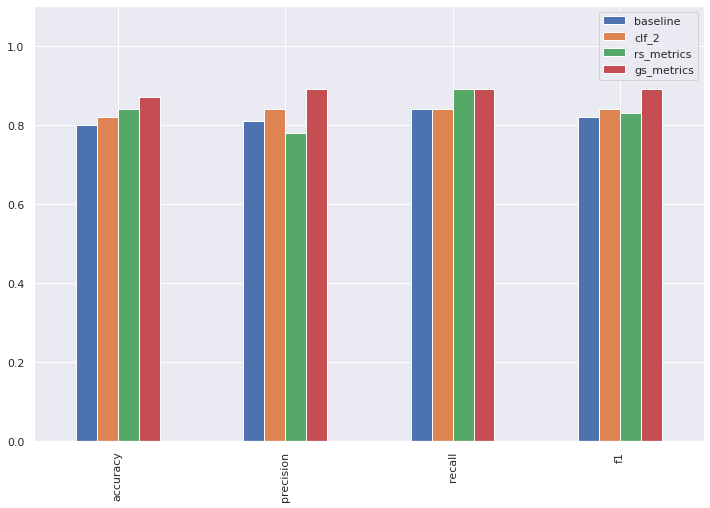

In [43]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

compare_metrics = pd.DataFrame({"baseline" : baseline_metrics,
                                "clf_2" : clf2_metrics,
                                "rs_metrics" : rs_metrics,
                                "gs_metrics" : gs_metrics
                               })
compare_metrics.plot.bar(figsize=(12,8))
plt.ylim(0,1.1)
plt.savefig("compare_metrics.png")

## Save and load model

## Pickle

In [19]:
import pickle 

### save model

In [20]:
with open("gs_random_forest_model.pk1","wb") as file : # .pkl stands for pickle file 
    pickle.dump(gs_clf, file)

### load model

In [25]:
with open("gs_random_forest_model.pk1","rb") as file : 
    pickle_load_model = pickle.load(file)

In [26]:
pickle_load_model

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None, 10], 'max_features': ['auto'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 200, 500]},
             verbose=2)

## Joblib

In the specific case of scikit-learn, it may be better to use joblib’s replacement of pickle (dump & load), which is more efficient on objects that carry large numpy arrays internally as is often the case for fitted scikit-learn estimators, but can only pickle to the disk and not to a string:

In [30]:
from joblib import dump, load

In [32]:
# Save model to file 
dump(gs_clf,"gs_random_forest_model.joblib")

['gs_random_forest_model.joblib']

In [34]:
# Import a saved joblib model 
load_job_model = load("gs_random_forest_model.joblib")

In [36]:
load_job_model

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None, 10], 'max_features': ['auto'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 200, 500]},
             verbose=2)

In [39]:
# Make prediction and evaluate model
y_preds = load_job_model.predict(x_test)

evaluate_def(y_test, y_preds) # the same at previous section

accuracy : 0.87
precision : 0.89
recall : 0.89
f1 : 0.89


{'accuracy': 0.87, 'precision': 0.89, 'recall': 0.89, 'f1': 0.89}